In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris_dataset=load_iris()
X=iris_dataset.data
y = iris_dataset.target

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=24, shuffle=True)

# Testing and observing decision tree with default prameters

In [11]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [12]:
from sklearn.metrics import accuracy_score
y_predict=clf.predict(X_test)
accuracy_score(y_test,y_predict)

0.98

[Text(446.4, 996.6, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 100\nvalue = [32, 37, 31]\nclass = versicolor'),
 Text(334.79999999999995, 815.4000000000001, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = setosa'),
 Text(558.0, 815.4000000000001, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]\nclass = versicolor'),
 Text(223.2, 634.2, 'petal length (cm) <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(111.6, 453.0, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(334.79999999999995, 453.0, 'petal width (cm) <= 1.55\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(223.2, 271.79999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(446.4, 271.79999999999995, 'petal length (cm) <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(334.79999999999995, 90.59999999999991, 'gini = 0.0\nsamples = 1\nvalue = [0

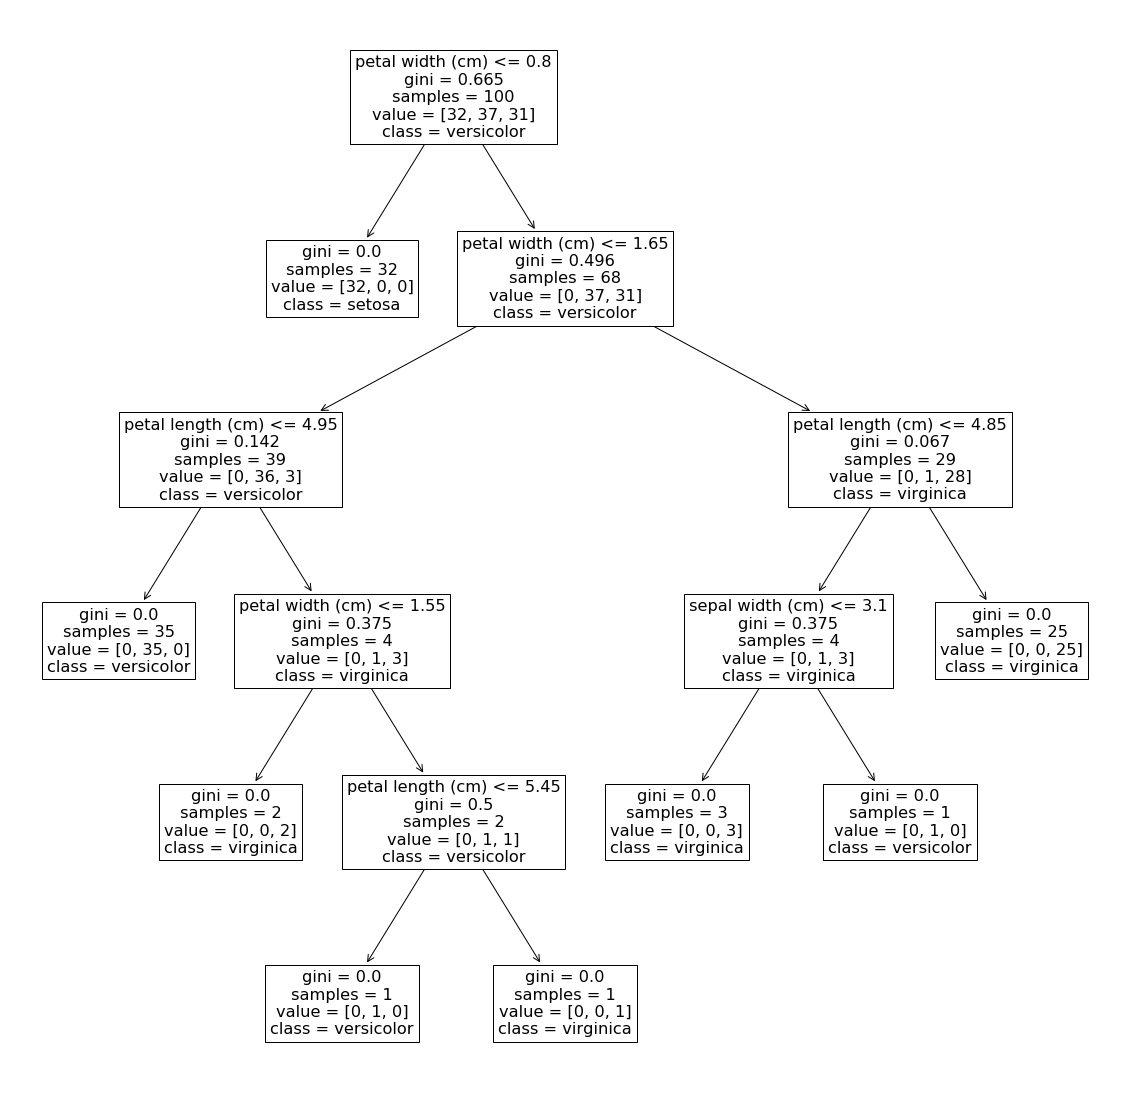

In [20]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plot_tree(clf, feature_names=iris_dataset.feature_names, class_names=iris_dataset.target_names)

# Finding best parameters for the decision tree

In [56]:
from sklearn.model_selection import GridSearchCV
model_clf=tree.DecisionTreeClassifier()
GSCV=GridSearchCV(model_clf, 
                  param_grid={'criterion':["gini","entropy"],'max_depth':[3,4,5,6,7,8],'max_leaf_nodes':[4,8,12,16]},
                 cv=20)

In [57]:
GSCV.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=20, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                  

In [58]:
import pandas as pd
resultsfd=pd.DataFrame(GSCV.cv_results_, columns=['params','mean_test_score','std_test_score','rank_test_score'])
pd.set_option("max_colwidth",100)
resultsfd

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4}",0.966667,0.066667,1
1,"{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 8}",0.960000,0.071181,13
2,"{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 12}",0.953333,0.072316,23
3,"{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 16}",0.960000,0.071181,13
4,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 4}",0.966667,0.066667,1
5,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 8}",0.953333,0.081921,23
6,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 12}",0.960000,0.078599,13
7,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 16}",0.946667,0.082372,36
8,"{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 4}",0.966667,0.066667,1
9,"{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 8}",0.946667,0.082372,36


In [59]:
resultsfd[resultsfd['rank_test_score']==1]

,params,mean_test_score,std_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 4}",0.966667,0.066667,1
4,"{'criterion': 'gini', 'max_depth': 4, 'max_leaf_nodes': 4}",0.966667,0.066667,1
8,"{'criterion': 'gini', 'max_depth': 5, 'max_leaf_nodes': 4}",0.966667,0.066667,1
12,"{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 4}",0.966667,0.066667,1
16,"{'criterion': 'gini', 'max_depth': 7, 'max_leaf_nodes': 4}",0.966667,0.066667,1
20,"{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 4}",0.966667,0.066667,1
24,"{'criterion': 'entropy', 'max_depth': 3, 'max_leaf_nodes': 4}",0.966667,0.066667,1
28,"{'criterion': 'entropy', 'max_depth': 4, 'max_leaf_nodes': 4}",0.966667,0.066667,1
32,"{'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': 4}",0.966667,0.066667,1
36,"{'criterion': 'entropy', 'max_depth': 6, 'max_leaf_nodes': 4}",0.966667,0.066667,1


In [60]:
# It shows that gini or entropy as a criterion with a max depth of 3 and max leaf nodes of 4 reaches the best results

In [63]:
GSCV.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=4,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Ploting the best trees; gini and entropy criterion

[Text(334.8, 713.475, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 100\nvalue = [32, 37, 31]\nclass = versicolor'),
 Text(167.4, 509.625, 'gini = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = setosa'),
 Text(502.20000000000005, 509.625, 'petal width (cm) <= 1.65\ngini = 0.496\nsamples = 68\nvalue = [0, 37, 31]\nclass = versicolor'),
 Text(334.8, 305.775, 'petal length (cm) <= 4.95\ngini = 0.142\nsamples = 39\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(167.4, 101.92499999999995, 'gini = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(502.20000000000005, 101.92499999999995, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(669.6, 305.775, 'gini = 0.067\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica')]

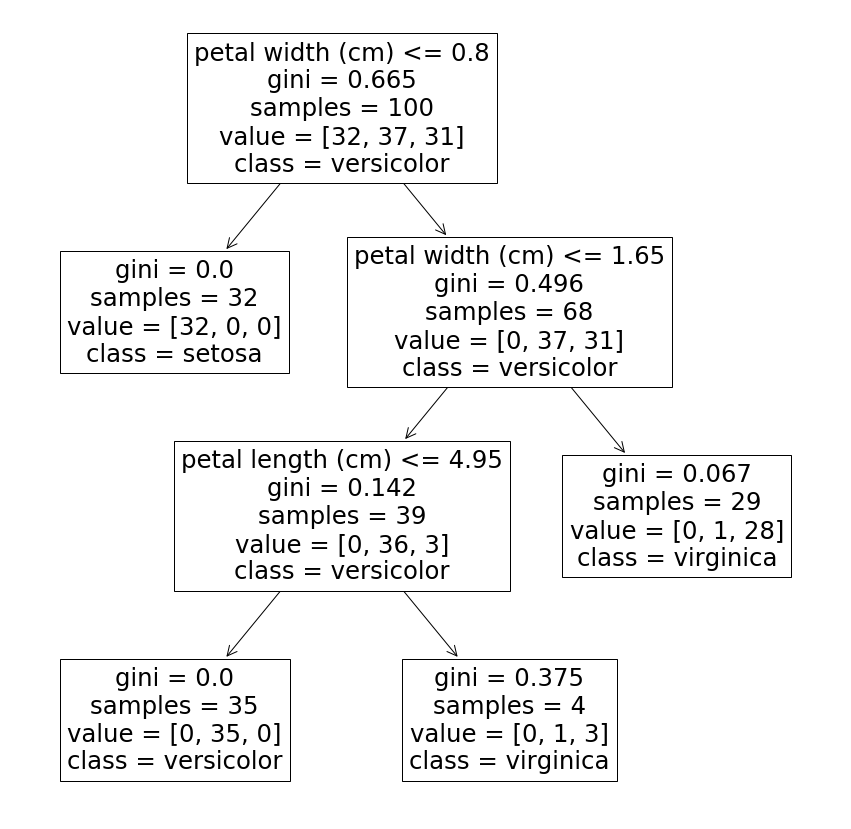

In [67]:
clf_gini=tree.DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=4)
clf_gini.fit(X_train,y_train)
plt.figure(figsize=(15,15))
plot_tree(clf_gini, feature_names=iris_dataset.feature_names, class_names=iris_dataset.target_names)

[Text(334.8, 713.475, 'petal width (cm) <= 0.8\nentropy = 1.581\nsamples = 100\nvalue = [32, 37, 31]\nclass = versicolor'),
 Text(167.4, 509.625, 'entropy = 0.0\nsamples = 32\nvalue = [32, 0, 0]\nclass = setosa'),
 Text(502.20000000000005, 509.625, 'petal width (cm) <= 1.65\nentropy = 0.994\nsamples = 68\nvalue = [0, 37, 31]\nclass = versicolor'),
 Text(334.8, 305.775, 'petal length (cm) <= 4.95\nentropy = 0.391\nsamples = 39\nvalue = [0, 36, 3]\nclass = versicolor'),
 Text(167.4, 101.92499999999995, 'entropy = 0.0\nsamples = 35\nvalue = [0, 35, 0]\nclass = versicolor'),
 Text(502.20000000000005, 101.92499999999995, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(669.6, 305.775, 'entropy = 0.216\nsamples = 29\nvalue = [0, 1, 28]\nclass = virginica')]

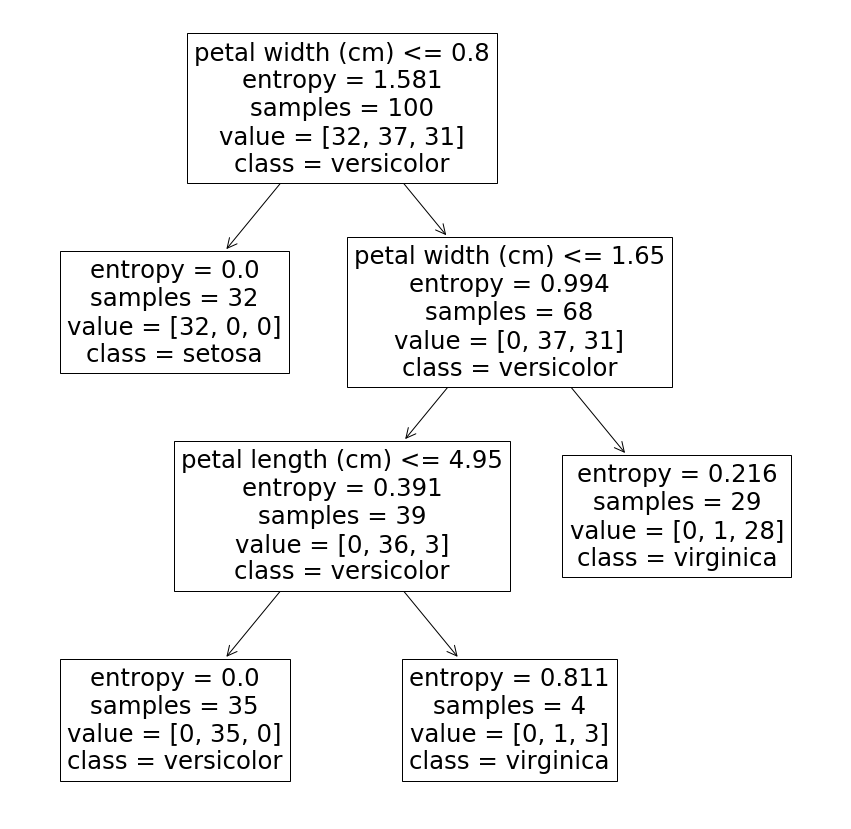

In [68]:
clf_entropy=tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,max_leaf_nodes=4)
clf_entropy.fit(X_train,y_train)
plt.figure(figsize=(15,15))
plot_tree(clf_entropy, feature_names=iris_dataset.feature_names, class_names=iris_dataset.target_names)